# **Dataset**

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [430]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [431]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [432]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


# **Perceptron from Scikit-learn**

In [433]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

In [434]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

Accuracy: 0.733


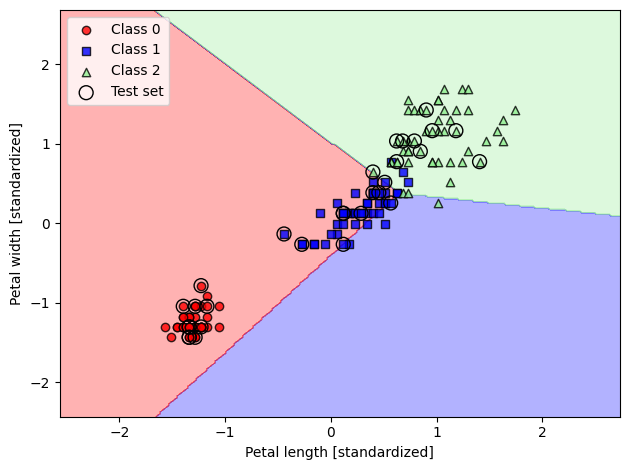

In [435]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(120, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# **Support Vector Machine(SVM)**

Accuracy: 0.967


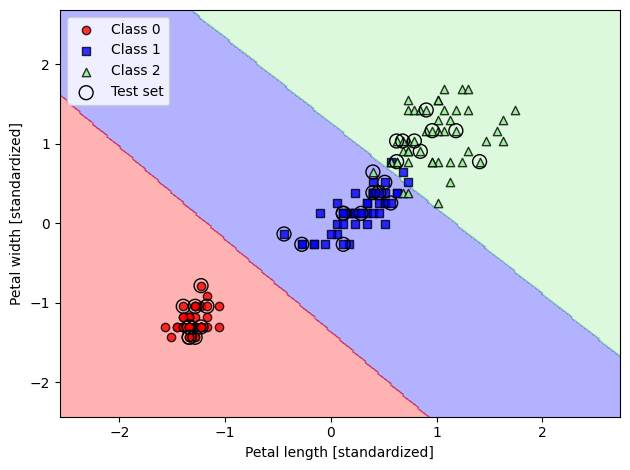

In [436]:
#Import necessary libraries
from sklearn.svm import SVC  # Support Vector Classifier

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=1)

# Fit (train) the SVM classifier on the training data
svm.fit(X_train_std, y_train)

# Use the trained SVM classifier to make predictions on the test data
y_pred = svm.predict(X_test_std)

# Calculate the accuracy of the classifier by comparing predicted labels (y_pred) to true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score with 3 decimal places
print(f'Accuracy: {accuracy:.3f}')

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(120, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# **Decision tree**

Decision Tree Accuracy: 0.973


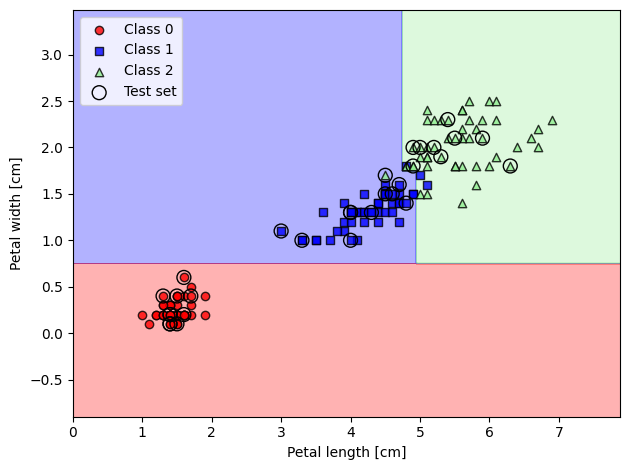

In [437]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree classifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Predict the labels for the combined dataset (train + test)
y_combined_pred = tree_model.predict(X_combined)

# Calculate the accuracy score
accuracy_tree = accuracy_score(y_combined, y_combined_pred)
print(f'Decision Tree Accuracy: {accuracy_tree:.3f}')

plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(120, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# **CLASS 1,2**

In [438]:
iris = datasets.load_iris()
X1 = iris.data[50:150, [2, 3]]
y1 = np.where(iris.target[50:150] == 1, 1, 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)

print('Labels counts in y:', np.bincount(y1))
print('Labels counts in y_train:', np.bincount(y1_train))
print('Labels counts in y_test:', np.bincount(y1_test))

Labels counts in y: [50 50]
Labels counts in y_train: [40 40]
Labels counts in y_test: [10 10]


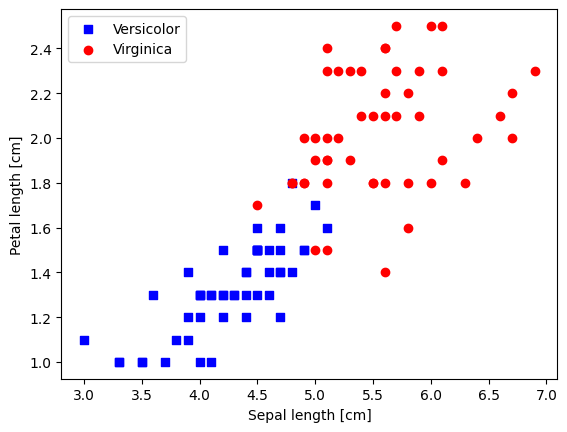

In [439]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
# select setosa and versicolor

# plot data
plt.scatter(X1[:50, 0], X1[:50, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(X1[50:100, 0], X1[50:100, 1],
            color='red', marker='o', label='Virginica')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Accuracy: 1.000


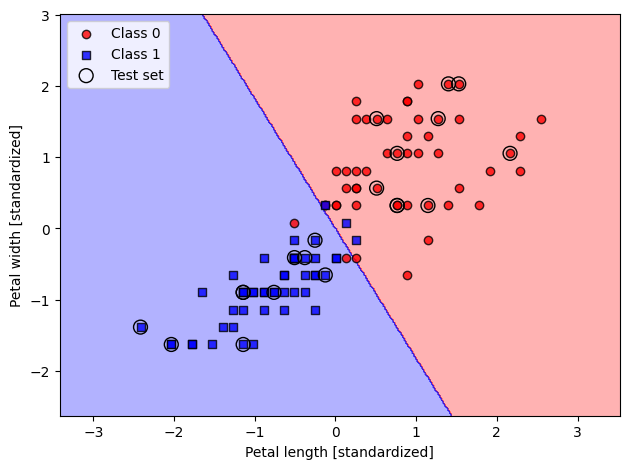

In [440]:
sc = StandardScaler()
sc.fit(X1_train)

X1_train_std = sc.transform(X1_train)
X1_test_std = sc.transform(X1_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X1_train_std, y1_train)

y1_pred = ppn.predict(X1_test_std)
X1_combined_std = np.vstack((X1_train_std, X1_test_std))
y1_combined = np.hstack((y1_train, y1_test))

print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

plot_decision_regions(X=X1_combined_std, y=y1_combined,
                      classifier=ppn, test_idx=range(80, 100))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Accuracy: 1.000


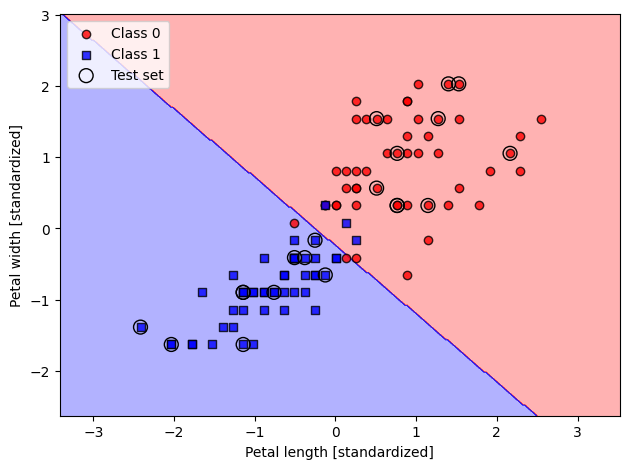

In [441]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)

# Fit (train) the SVM classifier on the training data
svm.fit(X1_train_std, y1_train)

# Use the trained SVM classifier to make predictions on the test data
y1_pred = svm.predict(X1_test_std)

# Calculate the accuracy of the classifier by comparing predicted labels (y_pred) to true labels (y_test)
accuracy = accuracy_score(y1_test, y1_pred)

# Print the accuracy score with 3 decimal places
print(f'Accuracy: {accuracy:.3f}')

plot_decision_regions(X1_combined_std,
                      y1_combined,
                      classifier=svm,
                      test_idx=range(80, 100))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Decision Tree Accuracy: 0.990


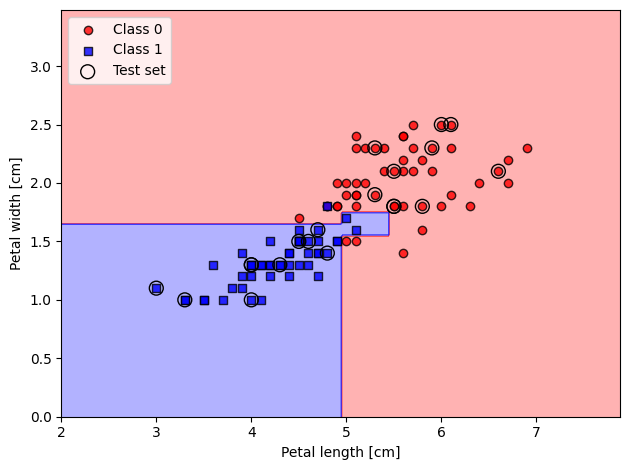

In [442]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree classifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X1_train, y1_train)

X1_combined = np.vstack((X1_train, X1_test))
y1_combined = np.hstack((y1_train, y1_test))

# Predict the labels for the combined dataset (train + test)
y1_combined_pred = tree_model.predict(X1_combined)

# Calculate the accuracy score
accuracy_tree = accuracy_score(y1_combined, y1_combined_pred)
print(f'Decision Tree Accuracy: {accuracy_tree:.3f}')

plot_decision_regions(X1_combined, y1_combined,
                      classifier=tree_model,
                      test_idx=range(80, 100))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# **CROSS VALIDATION 3 CLASS**


In [443]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = ppn.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
scores = clf.score(X_test_std, y_test)
print(scores)
clf = make_pipeline(preprocessing.StandardScaler(), ppn)
cross_val_score(clf, X, y, cv=cv)

0.7333333333333333


array([0.93333333, 0.93333333, 0.66666667, 0.8       , 0.93333333,
       0.93333333, 0.96666667, 0.86666667, 0.96666667, 0.86666667])

In [444]:

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
scores = clf.score(X_test_std, y_test)
print(scores)

clf = make_pipeline(preprocessing.StandardScaler(), svm)
cross_val_score(clf, X, y, cv=cv)

0.9666666666666667


array([0.96666667, 0.96666667, 0.93333333, 1.        , 0.93333333,
       1.        , 0.96666667, 1.        , 0.96666667, 1.        ])

In [445]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = tree_model.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
scores = clf.score(X_test_std, y_test)
print(scores)

clf = make_pipeline(preprocessing.StandardScaler(), tree_model)
cross_val_score(clf, X, y, cv=cv)

0.9666666666666667


array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.9       ,
       0.96666667, 0.96666667, 1.        , 0.93333333, 0.96666667])

# **CROSS VALIDATION 2 CLASS**


In [446]:
scaler = preprocessing.StandardScaler().fit(X1_train)
X_train_transformed = scaler.transform(X1_train)
clf = ppn.fit(X_train_transformed, y1_train)
X_test_transformed = scaler.transform(X1_test)
clf.score(X1_test_std, y1_test)
print(scores)

clf = make_pipeline(preprocessing.StandardScaler(), ppn)
cross_val_score(clf, X1, y1, cv=cv)

0.9666666666666667


array([0.85, 1.  , 0.95, 1.  , 0.95, 1.  , 0.9 , 0.95, 0.9 , 0.9 ])

In [447]:

scaler = preprocessing.StandardScaler().fit(X1_train)
X_train_transformed = scaler.transform(X1_train)
clf = svm.fit(X_train_transformed, y1_train)
X_test_transformed = scaler.transform(X1_test)
scores = clf.score(X1_test_std, y1_test)
print(scores)

clf = make_pipeline(preprocessing.StandardScaler(), svm)
cross_val_score(clf, X1, y1, cv=cv)

1.0


array([0.8 , 1.  , 0.95, 1.  , 0.95, 0.95, 0.9 , 0.95, 0.9 , 0.9 ])

In [448]:
scaler = preprocessing.StandardScaler().fit(X1_train)
X_train_transformed = scaler.transform(X1_train)
clf = tree_model.fit(X_train_transformed, y1_train)
X_test_transformed = scaler.transform(X1_test)
scores = clf.score(X1_test_std, y1_test)
print(scores)

clf = make_pipeline(preprocessing.StandardScaler(), tree_model)
cross_val_score(clf, X1, y1, cv=cv)

1.0


array([0.85, 1.  , 0.95, 1.  , 0.95, 1.  , 0.9 , 0.9 , 0.85, 0.9 ])